In [ ]:
!pip install shap

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#GradientBoost
from sklearn.ensemble import GradientBoostingClassifier
#Hyperparameter
from sklearn.model_selection import GridSearchCV, StratifiedKFold
#SHAP
import shap

In [ ]:
#Load the dataset
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [ ]:
train_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,48,admin.,divorced,university.degree,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-0.1,93.200,-42.0,4.021,5195.8,no
1,33,technician,divorced,high.school,no,no,no,cellular,nov,tue,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
2,75,retired,divorced,basic.4y,unknown,yes,no,cellular,oct,thu,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.754,5017.5,yes
3,35,technician,married,professional.course,no,yes,yes,cellular,may,wed,...,1,999,1,failure,-1.8,92.893,-46.2,1.334,5099.1,no
4,42,admin.,divorced,university.degree,no,yes,no,cellular,aug,mon,...,5,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no


In [ ]:
test_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,27,services,single,university.degree,no,yes,no,cellular,apr,thu,297,1,999,0,nonexistent,-1.8,93.075,-47.1,1.410,5099.1
1,31,self-employed,divorced,basic.9y,no,yes,no,cellular,may,fri,12,10,999,1,failure,-1.8,92.893,-46.2,1.250,5099.1
2,34,unemployed,married,basic.9y,no,yes,no,cellular,may,thu,218,4,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1
3,49,admin.,divorced,high.school,no,no,no,telephone,may,thu,136,3,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
4,29,admin.,married,unknown,no,unknown,unknown,telephone,jun,fri,83,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1


In [ ]:
train_df.shape

(39188, 21)

In [ ]:
test_df.shape

(2000, 20)

#1. Data Pre-processing
Summary of model characteristics before preparing data
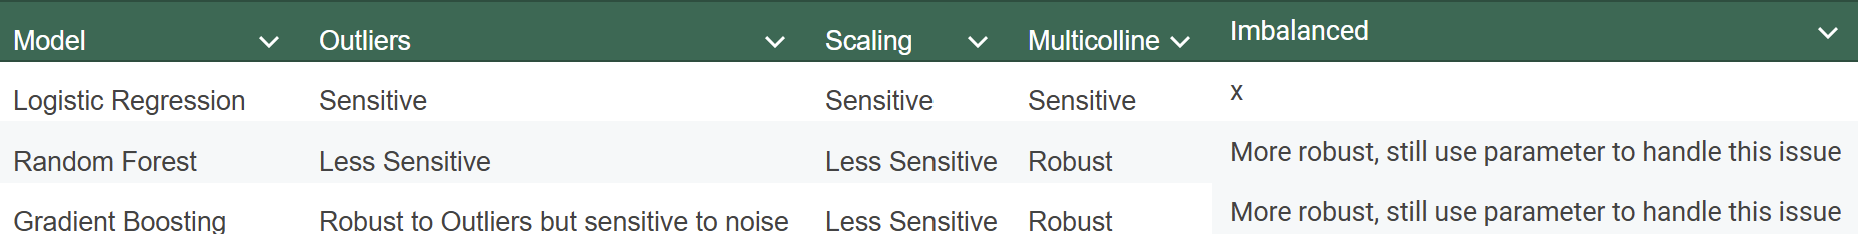

## a. Missing values

In [ ]:
#Discover data type and missing values
train_df.info()
missingvalues = train_df.isna().sum()
missingvalues

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39188 entries, 0 to 39187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39188 non-null  int64  
 1   job             39188 non-null  object 
 2   marital         39188 non-null  object 
 3   education       39188 non-null  object 
 4   default         39188 non-null  object 
 5   housing         39188 non-null  object 
 6   loan            39188 non-null  object 
 7   contact         39188 non-null  object 
 8   month           39188 non-null  object 
 9   day_of_week     39188 non-null  object 
 10  duration        39188 non-null  int64  
 11  campaign        39188 non-null  int64  
 12  pdays           39188 non-null  int64  
 13  previous        39188 non-null  int64  
 14  poutcome        39188 non-null  object 
 15  emp.var.rate    39188 non-null  float64
 16  cons.price.idx  39188 non-null  float64
 17  cons.conf.idx   39188 non-null 

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


## b. Handling Categorical data
**Consideration:** tree-based models such as Random Forest, GBoost are often less sensitive to the encoding scheme, as they can automatically learn the relationship between categories. On the other hand, linear models like Logistic Regression benefit more from one-hot encoding to capture the categorical information

In [ ]:
# Create a LabelEncoder object
le = LabelEncoder()
for column in train_df.columns:
    if train_df[column].dtype == object:
        le = LabelEncoder()
        train_df[column] = le.fit_transform(train_df[column].astype(str))

#Check if they are handled
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39188 entries, 0 to 39187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39188 non-null  int64  
 1   job             39188 non-null  int64  
 2   marital         39188 non-null  int64  
 3   education       39188 non-null  int64  
 4   default         39188 non-null  int64  
 5   housing         39188 non-null  int64  
 6   loan            39188 non-null  int64  
 7   contact         39188 non-null  int64  
 8   month           39188 non-null  int64  
 9   day_of_week     39188 non-null  int64  
 10  duration        39188 non-null  int64  
 11  campaign        39188 non-null  int64  
 12  pdays           39188 non-null  int64  
 13  previous        39188 non-null  int64  
 14  poutcome        39188 non-null  int64  
 15  emp.var.rate    39188 non-null  float64
 16  cons.price.idx  39188 non-null  float64
 17  cons.conf.idx   39188 non-null 

In [ ]:
# Create a LabelEncoder object
le = LabelEncoder()
for column in test_df.columns:
    if test_df[column].dtype == object:  # Check if the column is of object type (categorical)
        le = LabelEncoder()
        test_df[column] = le.fit_transform(test_df[column].astype(str))

#Check if they are handled
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2000 non-null   int64  
 1   job             2000 non-null   int64  
 2   marital         2000 non-null   int64  
 3   education       2000 non-null   int64  
 4   default         2000 non-null   int64  
 5   housing         2000 non-null   int64  
 6   loan            2000 non-null   int64  
 7   contact         2000 non-null   int64  
 8   month           2000 non-null   int64  
 9   day_of_week     2000 non-null   int64  
 10  duration        2000 non-null   int64  
 11  campaign        2000 non-null   int64  
 12  pdays           2000 non-null   int64  
 13  previous        2000 non-null   int64  
 14  poutcome        2000 non-null   int64  
 15  emp.var.rate    2000 non-null   float64
 16  cons.price.idx  2000 non-null   float64
 17  cons.conf.idx   2000 non-null   f

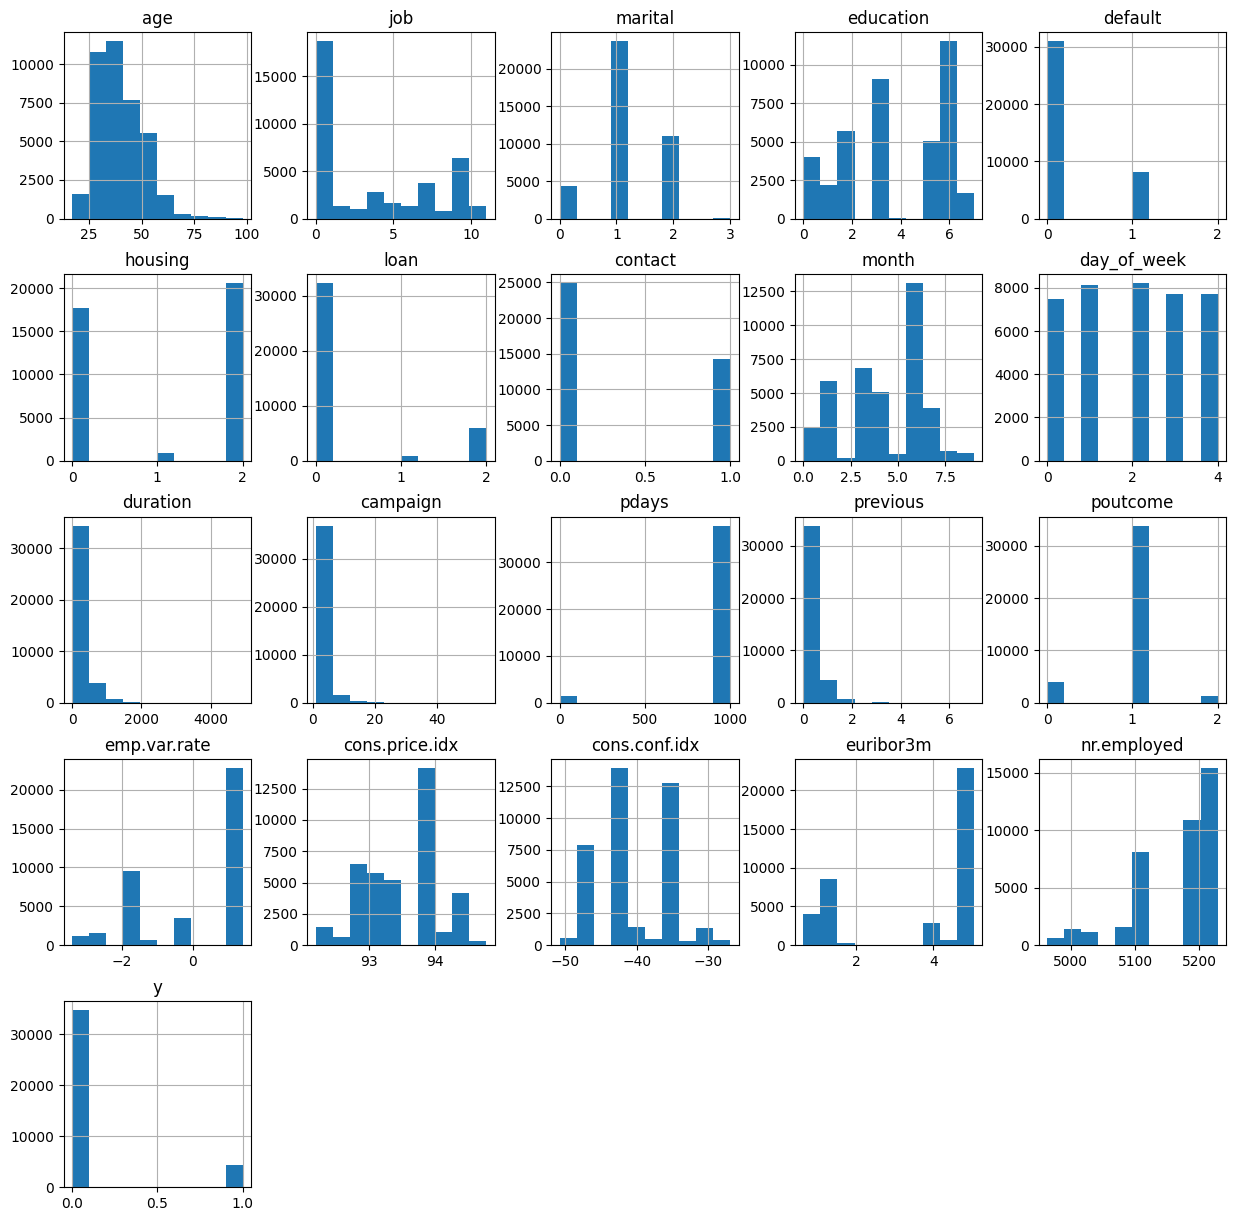

In [ ]:
# Visualize histograms for numerical features
train_df.hist(figsize=(15, 15))
plt.show()

## c. Feature Engineering
Three ways has been experimented:


1. Remove 'euribor3m', 'nr.employed' and 'con.price.idx'
2. Do not remove any features
3. Create new features by combining cons.price.idz, euribor3m as economy_interaction


As two of predictive models including Random Forest and Gradient Boost are robust to multicollinearity, so I decided not to remove any features in the dataset.
The second way turns out to give the best result based on main evaluation score in Kaggle (0.626)

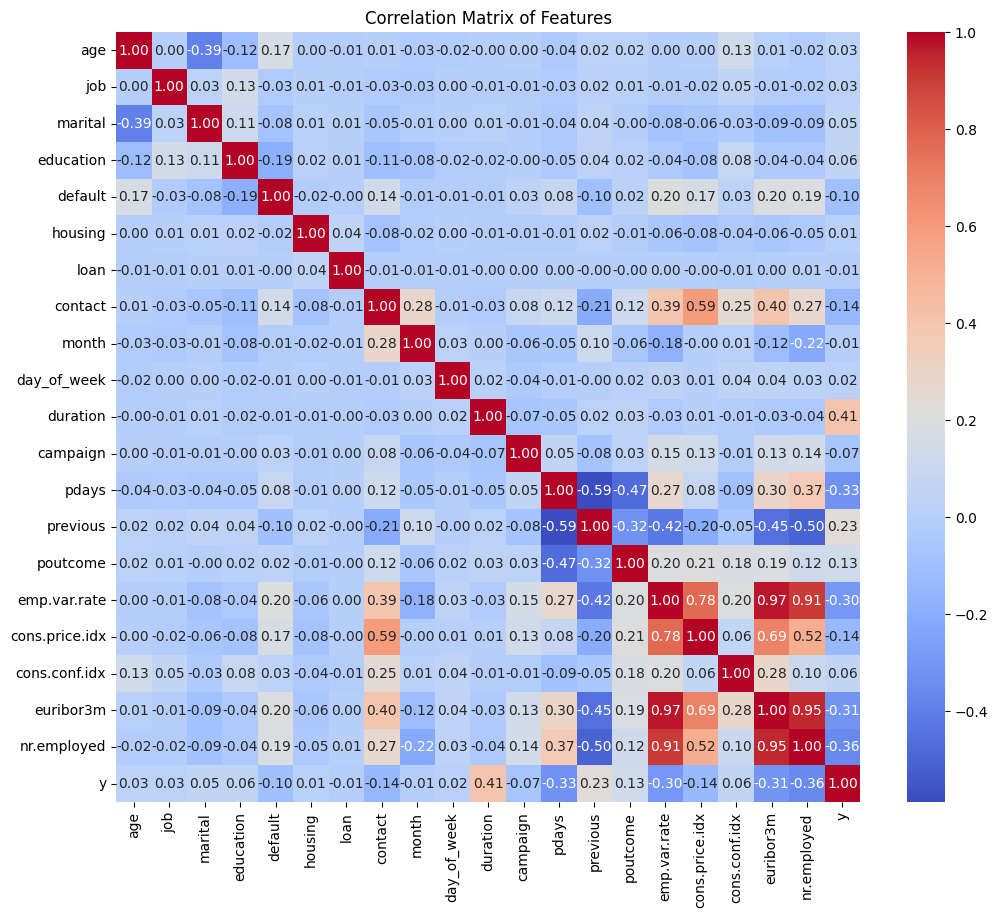

In [ ]:
# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


In [ ]:
# Define age group bins and labels
bins = [0, 25, 35, 45, 55, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56+']

# Create a new column 'age_group' using pd.cut
train_df['age_group'] = pd.cut(train_df['age'], bins=bins, labels=labels, include_lowest=True)

# Convert the age_group column to numerical using Label Encoding
train_df['age_group'] = le.fit_transform(train_df['age_group'])

# Optionally, remove the original 'age' column if you want
train_df = train_df.drop(['age'], axis=1)

In [ ]:
# Feature Engineering for test data
test_df['age_group'] = pd.cut(test_df['age'], bins=bins, labels=labels, include_lowest=True)
test_df['age_group'] = le.fit_transform(test_df['age_group'])
test_df = test_df.drop(['age'], axis=1)

## d. Feature Scaling
This ensures feature have a similar scale and prevent larger scale (for example pdays values 999) may dominating the learning process. This will i**mprove the model convergence, accuracy and fairness.**

Particularly, **Logistic Regression will benefit from this techniques more** than the other ones, due to convergence of optimization and regularization techniques.

In [ ]:
X = train_df.drop('y', axis=1)
y = train_df['y']

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit and transform the features using the scaler
X_scaled = scaler.fit_transform(X.drop(['job','marital','education','month','day_of_week','poutcome','age_group'],axis =1 ))

In [ ]:
dropped_columns = X[['job', 'marital', 'education', 'month', 'day_of_week', 'poutcome','age_group']]
# Reset indices to ensure alignment
X_scaled = pd.DataFrame(X_scaled, columns=X.drop(['job', 'marital', 'education', 'month', 'day_of_week', 'poutcome','age_group'], axis=1).columns)
dropped_columns.reset_index(drop=True, inplace=True)
X_scaled.reset_index(drop=True, inplace=True)

# Concatenate the scaled numerical columns and the dropped categorical columns
X_scaled = pd.concat([X_scaled, dropped_columns], axis=1)

In [ ]:
print("Final X_train_scaled shape after concatenation:", X_scaled.shape)

Final X_train_scaled shape after concatenation: (39188, 20)


In [ ]:
X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39188 entries, 0 to 39187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   default         39188 non-null  float64
 1   housing         39188 non-null  float64
 2   loan            39188 non-null  float64
 3   contact         39188 non-null  float64
 4   duration        39188 non-null  float64
 5   campaign        39188 non-null  float64
 6   pdays           39188 non-null  float64
 7   previous        39188 non-null  float64
 8   emp.var.rate    39188 non-null  float64
 9   cons.price.idx  39188 non-null  float64
 10  cons.conf.idx   39188 non-null  float64
 11  euribor3m       39188 non-null  float64
 12  nr.employed     39188 non-null  float64
 13  job             39188 non-null  int64  
 14  marital         39188 non-null  int64  
 15  education       39188 non-null  int64  
 16  month           39188 non-null  int64  
 17  day_of_week     39188 non-null 

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (27431, 20)
X_test shape: (11757, 20)
y_train shape: (27431,)
y_test shape: (11757,)


## e. Imbalanced data
I have tried to apply SMOTE for training data, it only delivered better result on training set but test set (overfitting), even though the tree-based algorithm is not robust to imbalanced data. However, Gradient Boost algorithm performs slightly better in this case, seems it handles imbalanced data better compared to the other algorithms.

# Train the model

## Logistic Regression
- Strengths: Interpretability, computationally efficient
- Limitations: sensitive to outliers, linear decision boundary affect its performance on complex, and non-linear datasets, imbalanced data
- Requires avg or no multicoliinearity between independent variables

In [ ]:
# Step 1: Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Step 2: Train the model on the training data
log_reg.fit(X_train, y_train)

# Step 3: Make predictions on the training and test set
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

In [ ]:
# Step 4: Evaluate the model's performance on the training set
accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)
# Print evaluation results
print(f"Training Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Train Classification Report:")
print(train_report)
print("Test Classification Report:")
print(test_report)

Training Accuracy: 0.9095548831613868
Confusion Matrix:
[[23662   642]
 [ 1839  1288]]
Train Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     24304
           1       0.67      0.41      0.51      3127

    accuracy                           0.91     27431
   macro avg       0.80      0.69      0.73     27431
weighted avg       0.90      0.91      0.90     27431

Test Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10454
           1       0.67      0.42      0.52      1303

    accuracy                           0.91     11757
   macro avg       0.80      0.70      0.73     11757
weighted avg       0.90      0.91      0.90     11757



## GradientBoostClassifier
1. Strengths: outperforms other ML
algorithms, especially on complex datasets, handle missing value, provides feature importances scores, robust to multicollinearity
2. Limitation: prone to overfitting, especially when the num of trees or their depth is too large, computational cost, sensitive to noise, need hyperparameter tuning





In [ ]:
# Step 1: Initialize the Gradient Boosting model
gb_clf = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)

# Step 2: Train the model on the training data
gb_clf.fit(X_train, y_train)

# Step 3: Make predictions on the training and test sets
y_train_pred = gb_clf.predict(X_train)
y_test_pred = gb_clf.predict(X_test)

# Step 4: Evaluate the model's performance on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

# Print evaluation results
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print("Confusion Matrix (Training):")
print(conf_matrix_train)
print("Confusion Matrix (Test):")
print(conf_matrix_test)
print("Train Classification Report:")
print(train_report)
print("Test Classification Report:")
print(test_report)


Training Accuracy: 0.9228245415770479
Test Accuracy: 0.9188568512375606
Confusion Matrix (Training):
[[23540   764]
 [ 1353  1774]]
Confusion Matrix (Test):
[[10113   341]
 [  613   690]]
Train Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     24304
           1       0.70      0.57      0.63      3127

    accuracy                           0.92     27431
   macro avg       0.82      0.77      0.79     27431
weighted avg       0.92      0.92      0.92     27431

Test Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10454
           1       0.67      0.53      0.59      1303

    accuracy                           0.92     11757
   macro avg       0.81      0.75      0.77     11757
weighted avg       0.91      0.92      0.91     11757



##RandomForestClassifier
1. Strengths: handle missing values, less prone to mulcollinearity and overfitting, handle non-linearities, have feature importance, which is useful to understand the influence of variables
2. Limitation: resource-intensive, black box nature, may suffer from higher bias if not tuned properly (optimal parameter)


In [ ]:
# Step 1: Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)

# Step 2: Train the model on the training data
rf_clf.fit(X_train, y_train)

# Step 3: Make predictions on the training and test sets
y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

# Step 4: Evaluate the model's performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

# Print evaluation results
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print("Confusion Matrix (Training):")
print(conf_matrix_train)
print("Confusion Matrix (Test):")
print(conf_matrix_test)
print("Train Classification Report:")
print(train_report)
print("Test Classification Report:")
print(test_report)


Training Accuracy: 0.9427654843060771
Test Accuracy: 0.9171557370077401
Confusion Matrix (Training):
[[24058   246]
 [ 1324  1803]]
Confusion Matrix (Test):
[[10213   241]
 [  733   570]]
Train Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     24304
           1       0.88      0.58      0.70      3127

    accuracy                           0.94     27431
   macro avg       0.91      0.78      0.83     27431
weighted avg       0.94      0.94      0.94     27431

Test Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10454
           1       0.70      0.44      0.54      1303

    accuracy                           0.92     11757
   macro avg       0.82      0.71      0.75     11757
weighted avg       0.91      0.92      0.91     11757



#Hyperparameter Tuning by GridSearch
This code performs hyperparameter tuning and evaluation for a Random Forest model using GridSearchCV and StratifiedKFold to maintain class balance. GridSearchCV runs a search over the parameter grid, **using f1_weighted scoring to account for class imbalances**, and StratifiedKFold ensures consistent distribution across folds.

In [ ]:
# Step 1: Set up refined parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True],
    'class_weight': ['balanced'],
    'max_features': [None, 'sqrt', 'log2']  # Added max_features for better generalization
}

# Use Stratified K-Fold to maintain class distribution
stratified_cv = StratifiedKFold(n_splits=5)

# Step 3: Use GridSearchCV with Stratified CV and f1_weighted scoring
grid_search = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid,
    cv=stratified_cv,
    scoring='f1_weighted',  # Focus on class balance
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Step 4: Get the best model
best_rf = grid_search.best_estimator_

# Step 5: Train the model on the training data
best_rf.fit(X_train, y_train)

# Step 6: Make predictions on the training and test sets
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Step 7: Evaluate the model's performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

# Print evaluation results
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print("Confusion Matrix (Training):")
print(conf_matrix_train)
print("Confusion Matrix (Test):")
print(conf_matrix_test)
print("Train Classification Report:")
print(train_report)
print("Test Classification Report:")
print(test_report)

# Step 8: Print best parameters
print("Best Parameters found by GridSearch:")
print(grid_search.best_params_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Training Accuracy: 0.9725493055302395
Test Accuracy: 0.9100961129539848
Confusion Matrix (Training):
[[23560   744]
 [    9  3118]]
Confusion Matrix (Test):
[[9755  699]
 [ 358  945]]
Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     24304
           1       0.81      1.00      0.89      3127

    accuracy                           0.97     27431
   macro avg       0.90      0.98      0.94     27431
weighted avg       0.98      0.97      0.97     27431

Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95     10454
           1       0.57      0.73      0.64      1303

    accuracy                           0.91     11757
   macro avg       0.77      0.83      0.79     11757
weighted avg       0.92      0.91      0.91     11757

Best Parameters found by GridSearch:
{'boot

#Test Prediction

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   job             2000 non-null   int64  
 1   marital         2000 non-null   int64  
 2   education       2000 non-null   int64  
 3   default         2000 non-null   int64  
 4   housing         2000 non-null   int64  
 5   loan            2000 non-null   int64  
 6   contact         2000 non-null   int64  
 7   month           2000 non-null   int64  
 8   day_of_week     2000 non-null   int64  
 9   duration        2000 non-null   int64  
 10  campaign        2000 non-null   int64  
 11  pdays           2000 non-null   int64  
 12  previous        2000 non-null   int64  
 13  poutcome        2000 non-null   int64  
 14  emp.var.rate    2000 non-null   float64
 15  cons.price.idx  2000 non-null   float64
 16  cons.conf.idx   2000 non-null   float64
 17  euribor3m       2000 non-null   f

In [ ]:
X = test_df
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit and transform the features using the scaler
X_test_scaled = scaler.fit_transform(X.drop(['job','marital','education','month','day_of_week','poutcome'],axis =1 ))

In [ ]:
dropped_columns = X[['job', 'marital', 'education', 'month', 'day_of_week', 'poutcome']]
# Reset indices to ensure alignment
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.drop(['job', 'marital', 'education', 'month', 'day_of_week', 'poutcome'], axis=1).columns)
dropped_columns.reset_index(drop=True, inplace=True)
X_test_scaled.reset_index(drop=True, inplace=True)

# Concatenate the scaled numerical columns and the dropped categorical columns
X_test_scaled = pd.concat([X_test_scaled, dropped_columns], axis=1)

In [ ]:
X_test_scaled.head()

,default,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,age_group,Predicted_y,y,id,job,marital,education,month,day_of_week,poutcome
0,-0.497655,0.956583,-0.445278,-0.752443,0.173962,-0.545543,0.21197,-0.352626,-1.203337,-0.864872,...,-0.923551,2.141633,1.321837,-1.731185,7,2,6,0,2,1
1,-0.497655,0.956583,-0.445278,-0.752443,-0.944715,2.438284,0.21197,1.656639,-1.203337,-1.179437,...,-0.923551,-0.466933,-0.756523,-1.729453,6,0,2,6,0,0
2,-0.497655,0.956583,-0.445278,-0.752443,-0.136127,0.449066,0.21197,-0.352626,-1.203337,-1.179437,...,-0.923551,-0.466933,1.321837,-1.727721,10,1,2,6,2,1
3,-0.497655,-1.070076,-0.445278,1.329004,-0.457993,0.117530,0.21197,-0.352626,0.645744,0.723505,...,1.014646,-0.466933,-0.756523,-1.725989,0,0,3,6,2,1
4,-0.497655,-0.056746,0.950577,1.329004,-0.666027,0.117530,0.21197,-0.352626,0.837028,1.537570,...,-0.923551,-0.466933,-0.756523,-1.724257,0,1,7,4,0,1


In [ ]:
# Get the feature names used during training
training_features = best_rf.feature_names_in_

# Ensure X_test_scaled has the same columns and order as training data
X_test_scaled = X_test_scaled[[c for c in training_features if c in X_test_scaled.columns]]


In [ ]:
y_test_pred = best_rf.predict(X_test_scaled)

In [ ]:
test_df['y'] = y_test_pred
test_df['id'] = range(0, len(test_df))
submission = test_df[['id', 'y']]
submission['y'] = submission['y'].map({1: 'yes', 0: 'no'})
submission.head()

<ipython-input-75-4d542b2cbd99>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['y'] = submission['y'].map({1: 'yes', 0: 'no'})


,id,y
0,0,yes
1,1,no
2,2,yes
3,3,no
4,4,no


In [ ]:
submission.to_csv('submission.csv', index=False)

#SHAP

In [ ]:
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer(X_train)

In [ ]:
np.shape(shap_values.values)

(27431, 20, 2)

## Summary Plot
The SHAP summary plot shows that **duration is the most influential feature**, with longer call durations positively impacting the likelihood of a successful outcome.

**Economic indicators** like nr.employed and euribor3m also have significant effects, where higher values generally decrease the model's output.

Features like pdays and campaign have moderate but varied influences on predictions.

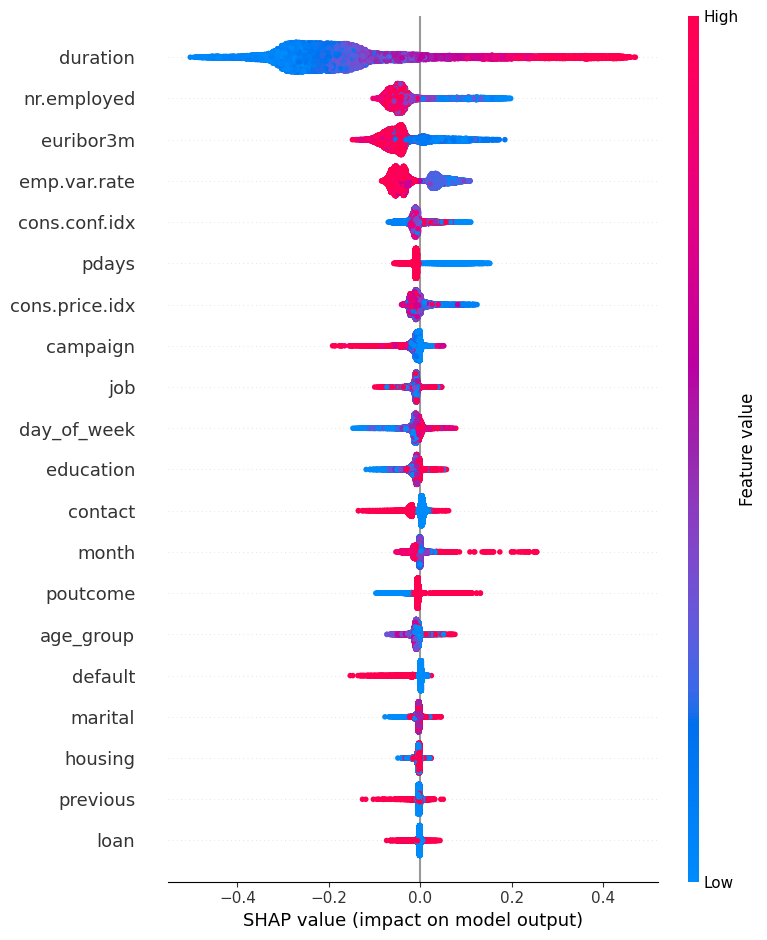

In [ ]:
shap.summary_plot(shap_values.values[:, :, 1], X_train)  # For Class 1

## Waterfall Plot

### Class 1:


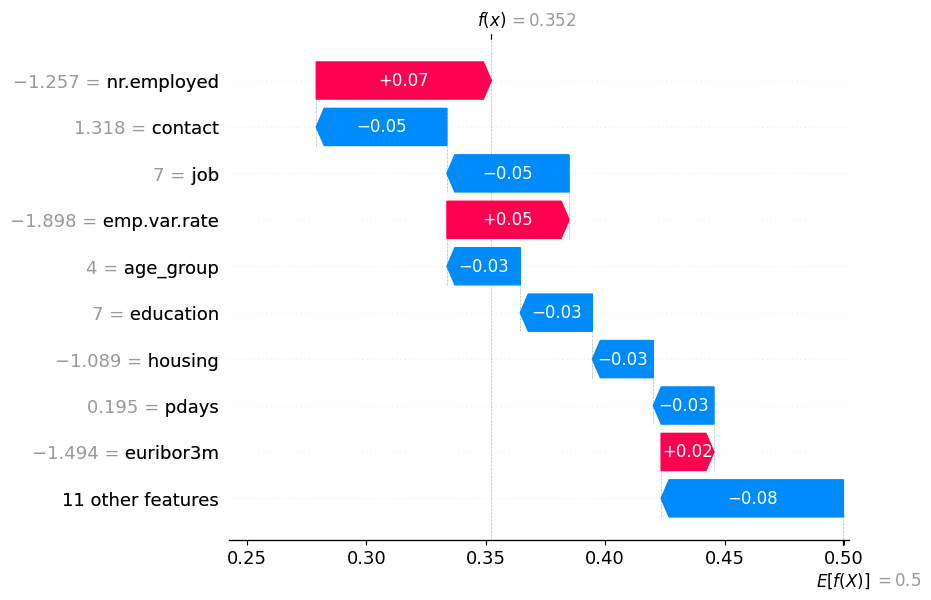

In [ ]:
record_id = 73
# Visualize the waterfall plot for Class 1 (use shap_values[record_id, :, 1] for Class 1)
shap.plots.waterfall(shap.Explanation(
    values=shap_values.values[record_id, :, 1],   # SHAP values for the selected instance and class
    base_values=explainer.expected_value[1],      # Expected value for Class 1
    data=X_train.iloc[record_id, :],              # Original feature values for the selected instance
    feature_names=X_train.columns                 # Feature names
))


### Class 0

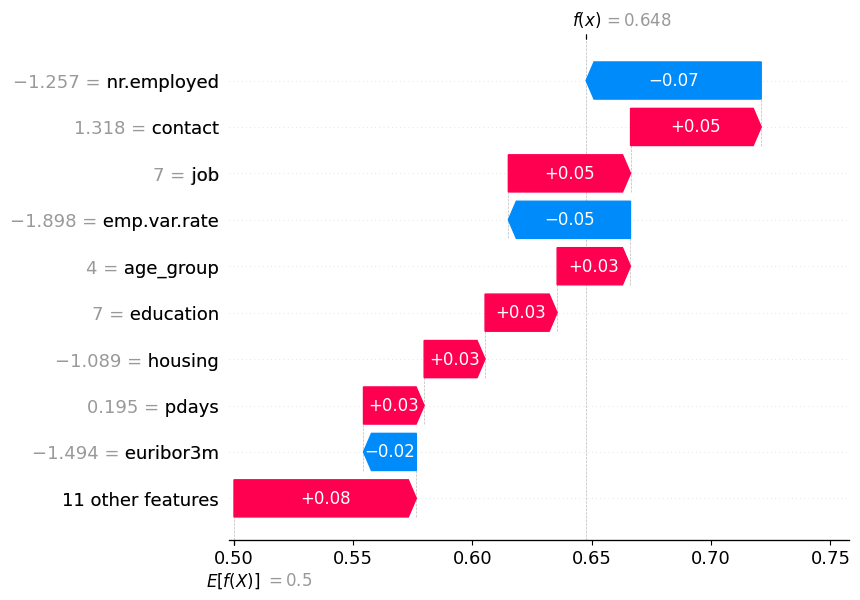

In [ ]:
record_id = 73
# Visualize the waterfall plot for Class 0
shap.plots.waterfall(shap.Explanation(
    values=shap_values.values[record_id, :, 0],   # SHAP values for the selected instance and class
    base_values=explainer.expected_value[0],      # Expected value for Class 0
    data=X_train.iloc[record_id, :],              # Original feature values for the selected instance
    feature_names=X_train.columns                 # Feature names
))


Insights: nr.employed strongly increases the likelihood of a positive outcome ("yes"), suggesting higher employment rates are linked with successful responses. Conversely, features like contact, job, and euribor3m decrease the likelihood, suggesting these factors negatively influence the probability of a successful outcome.

## Dependence Plot
Examine duration - the most important feature in predicting bank deposit decision
=> Duration is a significant factor influencing customer decisions. The SHAP summary plot indicates that **longer call durations increase the likelihood of a positive outcome**, shown by high SHAP values. This suggests that more engaging conversations may convince customers to respond favorably.

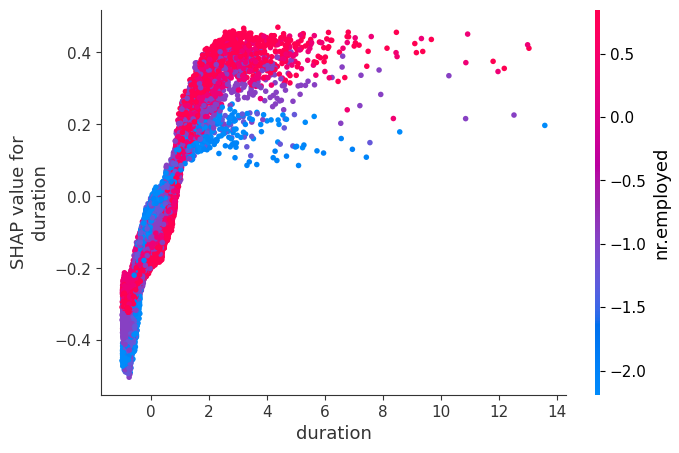

In [ ]:
shap.dependence_plot("duration", shap_values.values[:, :, 1], X_train)